In [ ]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv('output.csv')

In [ ]:
df3

,cid,acname,IC50 (uM),activity,canonical_smiles,standard_value
0,11625181,IC50,10.000,Inactive,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4CCCO...,10000.0
1,5494449,IC50,10.000,Inactive,CC1=CC(=NN1)NC2=CC(=NC(=N2)SC3=CC=C(C=C3)NC(=O...,10000.0
2,52938890,IC50,10.000,Inactive,C1=CC(=CC=C1/C=C(\C#N)/C(=O)N)C2=CNN=C2,10000.0
3,131954196,IC50,10.000,Inactive,CN(C)C(=O)/C(=C/C1CCC2C(C1)C(NN2)C3=CC(=C(C(=C...,10000.0
4,52938896,IC50,10.000,Inactive,C1=NC(=C2C(=N1)N(C(=N2)/C=C(\C#N)/C(=O)N)CCCO)N,10000.0
...,...,...,...,...,...,...
1704,3849988,IC50,20.970,Active,C1=CC(=CC(=C1)Cl)CN2C(=CC=C(C2=O)C(=O)N)C(F)(F)F,20970.0
1705,6411129,IC50,28.911,Active,CCOC1=C(C=CC(=C1)C2=NC3=C(NC(=O)N(C3=O)C)N=N2)...,28911.0
1706,5401874,IC50,37.440,Active,CC1=CC=CC=C1N(C(=O)C)/N=C\2/C(=O)C3=CC=CC=C3S2,37440.0
1707,2259658,IC50,45.187,Active,CC1=CC(=C(N1C2=CC(=C(C=C2)I)C)C)C=C3C(=O)NC(=O...,45187.0


In [ ]:
smiles_list = df3['canonical_smiles'].tolist()
smiles_list

['COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4CCCO4)OC',
 'CC1=CC(=NN1)NC2=CC(=NC(=N2)SC3=CC=C(C=C3)NC(=O)C4CC4)N5CCN(CC5)C',
 'C1=CC(=CC=C1/C=C(\\C#N)/C(=O)N)C2=CNN=C2',
 'CN(C)C(=O)/C(=C/C1CCC2C(C1)C(NN2)C3=CC(=C(C(=C3)OC)OC)OC)/C#N',
 'C1=NC(=C2C(=N1)N(C(=N2)/C=C(\\C#N)/C(=O)N)CCCO)N',
 'CC1=C(SC(=N1)NC)C2=NC(=NC=C2)NC3=CC=C(C=C3)O',
 'CCCC1=CC=C(C=C1)C(=O)NC',
 'C[C@H]([C@@H](C(=O)N)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CN=CN1)NC(=O)[C@H](CC(C)C)NC(=O)C2CCCN2C(=O)C)OP(=O)(O)OCCCCCCCCC3=CC=CC=C3',
 'C[C@H]([C@@H](C(=O)N)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CN=CN1CCCCC2=CC=CC=C2)NC(=O)[C@H](CC(C)C)NC(=O)C3CCCN3C(=O)C)OP(=O)(O)O',
 'CC(C)CCN1C(=O)C2=C(C=C(C=C2)C(=O)NC3CCCC3)N4C1=NNC4=S',
 'CC1=CC2=C(C=C1)N3C(=S)NN=C3N(C2=O)CCC4=CC=CC=C4',
 'C[C@H]([C@@H](C(=O)N)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CN=CN1CCCCCCCCC2=CC=CC=C2)NC(=O)[C@H](CC(C)C)NC(=O)C3CCCN3C(=O)C)OP(=O)(O)O',
 'C1=CC2=C(C=C1F)C(=O)N(C3=NNC(=S)N23)CCCNC(=O)[C@H](CCC(=O)O)N',
 'C1=CC=C(C=C1)CCN2C(=O)C3=C(C=CC(=C3)F)N4C2=NNC4=S',
 'C1=CC2=C(C=

In [ ]:
# Calculate fingerprints
fingerprints = []
for smile in smiles_list:
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=800)
    fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
from rdkit import DataStructs
import numpy as np
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X = np.asarray(fingerprint_arrays)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
if isinstance(X, np.ndarray):
    X1 = pd.DataFrame(X)
    X1.to_csv('X_testout.csv', index=False)

In [ ]:
Y=df3['pIC50']
Y

0       5.000000
1       4.000000
2       4.698970
3       4.000000
4       4.000000
          ...   
1207    4.602060
1208    4.602060
1209    7.795880
1210    8.602060
1211    7.721246
Name: pIC50, Length: 1212, dtype: float64

In [ ]:
if isinstance(X, np.ndarray):
    X1 = pd.DataFrame(X)

df=pd.concat([X1,Y],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,pIC50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.698970
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.602060
1208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.602060
1209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.795880
1210,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.602060


In [ ]:
df.to_csv('PLK1_pIC50_pubchem_Finger.csv', index=False)

In [ ]:
Y.shape

(1212,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((969, 800), (969,))

In [ ]:
X_test.shape, Y_test.shape

((243, 800), (243,))

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.7345114727450702

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([7.93594191, 7.48940855, 7.70584837, 5.32582423, 4.35257117,
       5.97715285, 6.11408258, 4.51186245, 8.43602582, 8.40977401,
       6.64075355, 6.27716218, 7.84265225, 5.77908145, 7.09821905,
       7.89513375, 7.00282303, 7.37484848, 6.9504954 , 4.4109063 ,
       5.73527394, 7.41480974, 7.98659762, 7.79646378, 5.74626042,
       6.15027221, 4.49166759, 5.78625964, 5.58822859, 8.29716051,
       8.11281965, 8.98989902, 6.51292677, 6.36488114, 4.59463237,
       4.68116411, 7.28145088, 5.7191302 , 6.62439476, 8.98989902,
       6.01518875, 4.78140129, 4.48976537, 7.84265225, 4.69936862,
       5.04642871, 8.55961326, 4.48001003, 7.70048189, 5.09197279,
       5.18034059, 7.46040512, 6.36614708, 4.89648685, 8.43602582,
       6.820301  , 7.15953424, 6.22666578, 5.05261306, 5.80422102,
       7.21976473, 7.5769282 , 6.34360717, 4.09882429, 8.02168929,
       4.28155   , 5.28575023, 7.14334472, 5.74626042, 6.47102565,
       7.34433312, 4.41426956, 5.12125064, 6.72942753, 8.21399

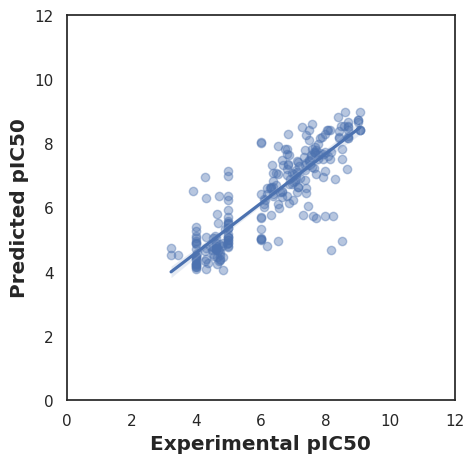

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

In [ ]:

import pickle
# Save the model to a file
with open('KCNN4.pkl', 'wb') as f:
  pickle.dump(model, f)


CNN model training

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from rdkit import Chem
from rdkit.Chem import AllChem

# Load and preprocess the data
# Assume smiles_data and ic50_data are your lists of SMILES and IC50 values

# Convert SMILES to Morgan fingerprints


X_data = X
y_data = np.array(Y)

# Normalize the IC50 values
y_data = (y_data - y_data.mean()) / y_data.std()

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Reshape the input data to match the expected input shape of the CNN model
img_size = int(np.sqrt(X_train.shape[1]))
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)

ValueError: cannot reshape array of size 775200 into shape (969,28,28,1)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import LabelBinarizer

# Load and preprocess the data
# Assume smiles_data and ic50_data are your lists of SMILES and IC50 values

# Convert SMILES to Morgan fingerprints
def smiles_to_fingerprint(smiles, radius=2, nBits=500):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
    return np.array(fp)

X_data = np.array(X)

# Convert IC50 values to binary labels (e.g., active/inactive)
# Define thresholds for active, inactive, and intermediate classes based on pIC50 values
active_threshold = 7  # pIC50 >= 6.0 is considered active
inactive_threshold = 6  # pIC50 < 5.0 is considered inactive


# Convert pIC50 values to class labels
y_data = np.array([0 if pic50 < inactive_threshold else 1 if pic50 >= active_threshold else 2 for pic50 in Y])

# One-hot encode the class labels
lb = LabelBinarizer()
y_data = lb.fit_transform(y_data)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=100)

# Reshape the input data to match the expected input shape of the CNN model
img_size = int(np.sqrt(X_train.shape[1]))
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)


# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(lb.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and record the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

ValueError: cannot reshape array of size 775200 into shape (969,28,28,1)

**Conv1D Model**

In [ ]:
IC50_values = 10**(-np.array(Y))
IC50_values

array([7.50e-07, 1.00e-07, 5.00e-05, ..., 3.81e-06, 3.46e-06, 2.78e-06])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

# Prepare input data
# Convert SMILES to Morgan fingerprints
def smiles_to_fingerprint(smiles, radius=2, nBits=1024):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
    return np.array(fp)

X = np.array(X)


# Convert IC50 values to binary labels (e.g., active/inactive)
# Define thresholds for active, inactive, and intermediate classes based on pIC50 values
active_threshold = 6  # pIC50 >= 6.0 is considered active
inactive_threshold = 5  # pIC50 < 5.0 is considered inactive


# Convert pIC50 values to class labels
IC50_values = 10**(-np.array(Y))
Y=IC50_values

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Define the CNN model with L2 regularization and dropout
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=25, validation_data=(X_val, y_val))

Epoch 1/500
151/151 [==============================] - 10s 61ms/step - loss: 0.0409 - accuracy: 0.0000e+00 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 2/500
151/151 [==============================] - 10s 63ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 3/500
151/151 [==============================] - 10s 66ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 4/500
 76/151 [==============>...............] - ETA: 4s - loss: 0.0057 - accuracy: 0.0000e+00

KeyboardInterrupt: 

# Visualize the training history

Accuracy

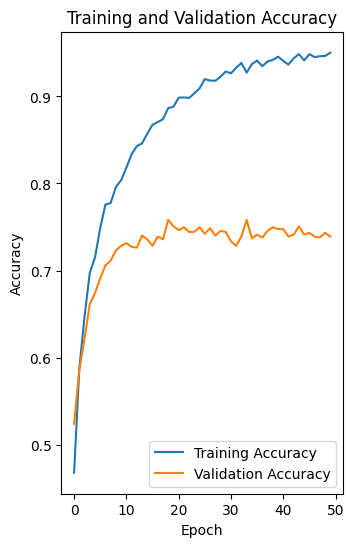

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Loss

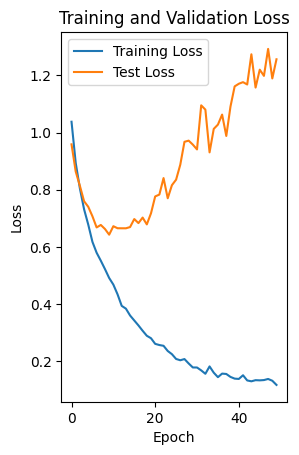

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()